In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML
import tempfile; tempfile.tempdir='./'

import time as tm
from matplotlib import colors

from celluloid import Camera


class Ising:
    def __init__(self, n, t):
        self.size = n
        self.grid = np.random.choice([-1, 1], size = (n,n))
        self.temp = t

    def update(self):
        i = np.random.choice(self.size)
        j = np.random.choice(self.size)

        e = -self.grid[i][j] * (self.grid[(i - 1) % self.size][j]     #top
                                + self.grid[(i + 1) % self.size][j]   #bottom
                                + self.grid[i][(j - 1) % self.size]   #left
                                + self.grid[i][(j + 1) % self.size])  #right

        if np.random.random() < min(1, np.exp(2 * e/self.temp)):
            self.grid[i][j] *= -1

    def sim(self, n):
        for _ in range(n):
            self.update()
        return self.grid

    def avgMag(self):
        return (sum([sum(i) for i in self.grid]))/(self.size**2)


def plotIt(grid):
    cm = colors.ListedColormap(['yellow', 'purple'])
    plt.imshow(grid, cmap = cm, extent = [0, grid.shape[1], 0, grid.shape[0]])
    plt.show()

T =  1


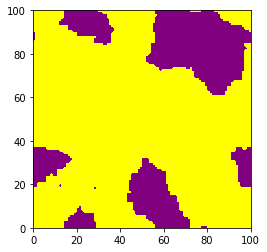

T =  2


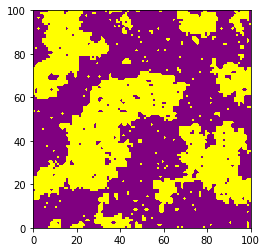

T =  3


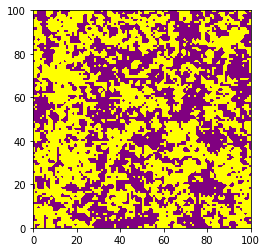

T =  4


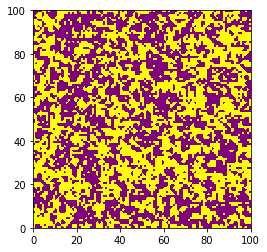

T =  5


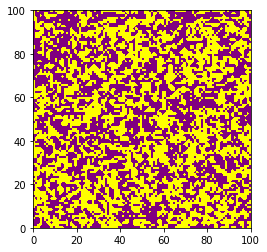

In [8]:
for t in range(1,6):
    ising = Ising(100, t)
    print('T = ', t)
    plotIt(ising.sim(1000000))

T =  1


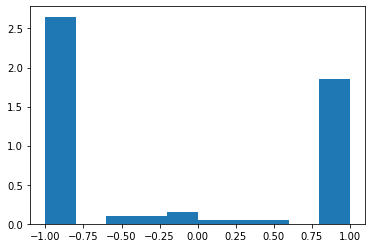

T =  2


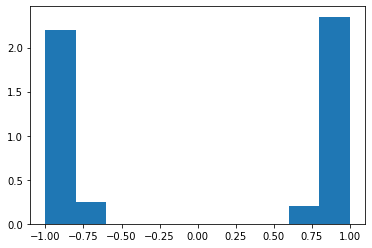

T =  3


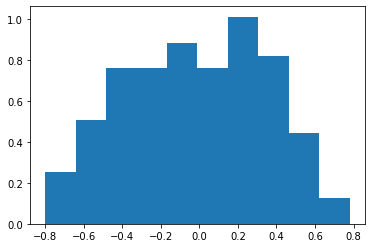

T =  4


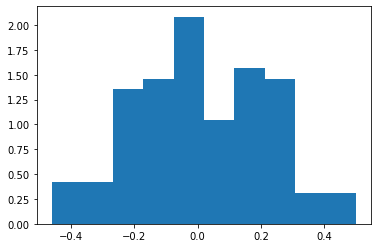

T =  5


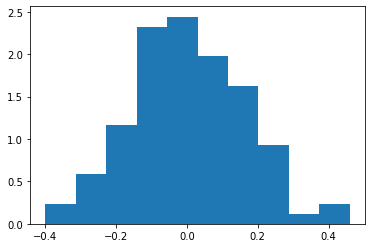

In [6]:
for t in range(1,6):
    mags = []
    for _ in range(100):
        ising = Ising(10,t)
        _ = ising.sim(10000)
        mags.append(ising.avgMag())
    print('T = ', t)
    plt.hist(mags, density=True)
    plt.show()